# Basic Data Frame Processing with `dfply`

In [1]:
import pandas as pd
import matplotlib.pylab as plt
from dfply import *
%matplotlib inline

In [2]:
artists = pd.read_csv("./data/Artists.csv")
artwork = pd.read_csv("./data/Artworks.csv")

# Exploring and cleaning the MoMA data

In the previous lecture, we identified some errors

* Multiple instances of "Nationality unknown" in `artists.Nationality`
* `artist.BeginDate` is 0 $\rightarrow$ probably should be missing
* Parentheses in `artwork.BeginDate`
* Very large value in `artwork['Height (cm)']`

In this section, we will illustrate exploring and cleaning up these data with `select`, `filter_by` and `mutate`

## Renaming columns the `dfply` way

* We use `rename` to rename columns as part of a pipe.
* We can use `kwargs` to rename all columns at once

In [3]:
artists_renamed = artists >>rename(Wiki_QID = 'Wiki QID')
artists_renamed.head()

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki_QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN


## Renaming all the columns at once

1. Make a translation dictionary
2. Pass to `rename` by unpacking keywords with `**`

## Step 1 - Translation dictionary

* keys: New name
* values: Old name

In [4]:
fix_col_name = lambda s: s.replace(' ', '_').replace('(', '').replace(')', '').replace('.', '')


new_cols = {fix_col_name(name):name 
            for name in artwork.columns}

new_cols

{'Title': 'Title',
 'Artist': 'Artist',
 'ConstituentID': 'ConstituentID',
 'ArtistBio': 'ArtistBio',
 'Nationality': 'Nationality',
 'BeginDate': 'BeginDate',
 'EndDate': 'EndDate',
 'Gender': 'Gender',
 'Date': 'Date',
 'Medium': 'Medium',
 'Dimensions': 'Dimensions',
 'CreditLine': 'CreditLine',
 'AccessionNumber': 'AccessionNumber',
 'Classification': 'Classification',
 'Department': 'Department',
 'DateAcquired': 'DateAcquired',
 'Cataloged': 'Cataloged',
 'ObjectID': 'ObjectID',
 'URL': 'URL',
 'ThumbnailURL': 'ThumbnailURL',
 'Circumference_cm': 'Circumference (cm)',
 'Depth_cm': 'Depth (cm)',
 'Diameter_cm': 'Diameter (cm)',
 'Height_cm': 'Height (cm)',
 'Length_cm': 'Length (cm)',
 'Weight_kg': 'Weight (kg)',
 'Width_cm': 'Width (cm)',
 'Seat_Height_cm': 'Seat Height (cm)',
 'Duration_sec': 'Duration (sec.)'}

## Step 2 - Unpack in `rename` 

In [5]:
artwork_renamed = (artwork >>
                     rename(**new_cols))
artwork_renamed.columns

Index(['Title', 'Artist', 'ConstituentID', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL',
       'Circumference_cm', 'Depth_cm', 'Diameter_cm', 'Height_cm', 'Length_cm',
       'Weight_kg', 'Width_cm', 'Seat_Height_cm', 'Duration_sec'],
      dtype='object')

## OR use `more_dfply.fix_names`

Fix names removes all punctuation

In [6]:
from more_dfply import fix_names
artwork_renamed = (artwork >> fix_names)
artwork_renamed.columns

Index(['Title', 'Artist', 'ConstituentID', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL',
       'Circumference_cm', 'Depth_cm', 'Diameter_cm', 'Height_cm', 'Length_cm',
       'Weight_kg', 'Width_cm', 'Seat_Height_cm', 'Duration_sec'],
      dtype='object')

## Example 1 - Problems with `artist.Nationality`

In [7]:
artists_renamed.Nationality.value_counts()

American     5194
German        969
British       854
French        848
Italian       539
             ... 
Cambodian       1
Coptic          1
Ivorian         1
Kuwaiti         1
Beninese        1
Name: Nationality, Length: 118, dtype: int64

In [8]:
artists_renamed.Nationality.value_counts().index

Index(['American', 'German', 'British', 'French', 'Italian', 'Japanese',
       'Swiss', 'Dutch', 'Russian', 'Austrian',
       ...
       'Ugandan', 'Persian', 'Burkinabe', 'Catalan', 'Sierra Leonean',
       'Cambodian', 'Coptic', 'Ivorian', 'Kuwaiti', 'Beninese'],
      dtype='object', length=118)

In [9]:
[tup for tup in zip(artists.Nationality.value_counts().index, artists.Nationality.value_counts())]

[('American', 5194),
 ('German', 969),
 ('British', 854),
 ('French', 848),
 ('Italian', 539),
 ('Japanese', 509),
 ('Swiss', 294),
 ('Dutch', 277),
 ('Russian', 267),
 ('Austrian', 242),
 ('Canadian', 193),
 ('Nationality unknown', 180),
 ('Brazilian', 163),
 ('Spanish', 160),
 ('Argentine', 140),
 ('Polish', 130),
 ('Swedish', 130),
 ('Mexican', 129),
 ('Danish', 119),
 ('Belgian', 93),
 ('Chinese', 80),
 ('Czech', 78),
 ('Israeli', 74),
 ('Chilean', 72),
 ('South African', 68),
 ('Cuban', 63),
 ('Finnish', 61),
 ('Venezuelan', 60),
 ('Australian', 55),
 ('Colombian', 54),
 ('Hungarian', 53),
 ('Norwegian', 47),
 ('Indian', 38),
 ('Peruvian', 37),
 ('Korean', 34),
 ('Croatian', 27),
 ('Uruguayan', 24),
 ('Yugoslav', 23),
 ('Irish', 22),
 ('Turkish', 22),
 ('Romanian', 20),
 ('Scottish', 20),
 ('New Zealander', 17),
 ('Haitian', 16),
 ('Portuguese', 13),
 ('Greek', 12),
 ('Icelandic', 12),
 ('Ukrainian', 11),
 ('Iranian', 11),
 ('Serbian', 11),
 ('Slovenian', 9),
 ('Slovak', 8),
 ('Bo

In [10]:
(artists_renamed
>> filter_by(X.Nationality.isnull())
)

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki_QID,ULAN
14,18,Artko,NaN,NaN,NaN,0,0,NaN,NaN
90,101,Album-miscellaneous,Various,NaN,NaN,0,0,NaN,NaN
173,201,Aoki Toshio,NaN,NaN,NaN,0,0,NaN,NaN
462,525,Palme Berthold,NaN,NaN,NaN,0,0,NaN,NaN
977,1102,Chikuchi Toshio,NaN,NaN,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
15201,132427,Krasnyi proletarii,NaN,NaN,NaN,0,0,NaN,NaN
15214,132956,Matthew Wong,"Canadian, 1984 - 2019",NaN,NaN,0,0,NaN,NaN
15216,133005,Chesnutt Brothers Studio,NaN,NaN,NaN,0,0,NaN,NaN
15220,133027,Studio of Dr. Paul Wolff & Tritschler,NaN,NaN,NaN,0,0,NaN,NaN


### <font color="red"> Question </font>

Is it ok to have both `Nationality unknown` and `NaN`?  What would you do if your answer was no?

## Example 2 - Zeros $\rightarrow$ `np.Nan`

Recall that `artists.BeginDate` had lots of zeros

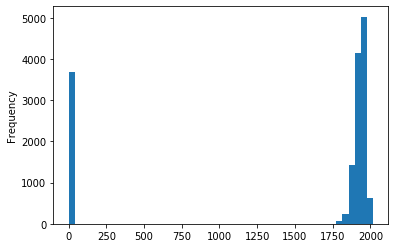

In [12]:
import matplotlib.pylab as plt
artists_renamed.BeginDate.plot(kind='hist', bins = 50)

In [15]:
help(artists_renamed.BeginDate.plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data)
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'p

## Cases with `BeginDate != 0`

Start by looking at the correct cases.  Take note of the `ArtistBio`

In [16]:
(artists_renamed >>
  filter_by(X.BeginDate != 0) >>
  head(5))

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki_QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN


## Cases with `BeginDate == 0`

Note the date in the `ArtistBio` $\rightarrow$ pretty clear this is missing data

In [17]:
(artists_renamed >>
  filter_by(X.BeginDate == 0) >>
  head(5))

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki_QID,ULAN
14,18,Artko,NaN,NaN,NaN,0,0,NaN,NaN
17,22,Isidora Aschheim,Israeli,Israeli,Female,0,0,NaN,NaN
26,32,Atelier Eggers,French,French,NaN,0,0,NaN,NaN
27,33,A.A.P.,American,American,NaN,0,0,NaN,NaN
47,55,Norman Ackroyd,British,British,Male,0,0,Q7051892,500029028.0


## The solution: Replace 0 with `np.NaN`

In [18]:
replace_zero = {0:np.NaN}
artists_new = (artists_renamed >>
                mutate(BeginDate = X.BeginDate.replace(replace_zero)))

## Verify that it works

In [19]:
(artists_new >>
  filter_by(X.BeginDate == 0) >>
  head(5))

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki_QID,ULAN


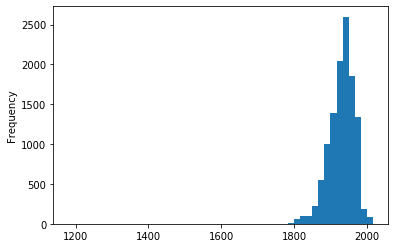

In [20]:
artists_new.BeginDate.plot(kind='hist', bins = 50)

## Next Up

Now you should be ready to tackle [Lab 1](./lab_1_cleaning_up_the_MoMA_artwork.ipynb), which focuses on cleaning up the MoMA artwork file.